In [1]:
from __future__ import print_function, division, absolute_import, unicode_literals
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
import matplotlib.pyplot as plt


In [2]:
nx = 572
ny = 572
     
training_iters = 10
epochs = 3
dropout = 0.75 # Dropout, probability to keep units
display_step = 2
restore = False
 

In [3]:
generator = image_gen.RgbDataProvider(nx, ny, cnt=20, rectangles=False)
    
net = unet.Unet(channels=generator.channels, 
                n_class=generator.n_class, 
                layers=3, 
                features_root=16,
                cost="dice_coefficient")
 

2017-10-28 23:08:13,455 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [4]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))


In [5]:
path = trainer.train(generator, "./unet_trained", 
                        training_iters=training_iters, 
                        epochs=epochs, 
                        dropout=dropout, 
                        display_step=display_step, 
                        restore=restore)
     

2017-10-28 23:08:21,747 Removing '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/prediction'
2017-10-28 23:08:21,749 Removing '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/unet_trained'
2017-10-28 23:08:21,754 Allocating '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/prediction'
2017-10-28 23:08:21,755 Allocating '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/unet_trained'
2017-10-28 23:08:34,976 Verification error= 16.2%, loss= -0.5410
2017-10-28 23:08:39,895 Start optimization
2017-10-28 23:08:47,648 Iter 0, Minibatch Loss= -0.5693, Training Accuracy= 0.8444, Minibatch error= 15.6%
2017-10-28 23:09:01,668 Iter 2, Minibatch Loss= -0.7184, Training Accuracy= 0.8386, Minibatch error= 16.1%
2017-10-28 23:09:16,338 Iter 4, Minibatch Loss= -0.8107, Training Accuracy= 0.8082, Minibatch error= 19.2%
2017-10-28 23:09:29,987 Iter 6, Minibatch Loss= -0.8611, Training Accuracy= 0.8582, Minibatch error= 14.2%
2017-10-28 23:09:43,636 Iter 8, Minibatch Lo

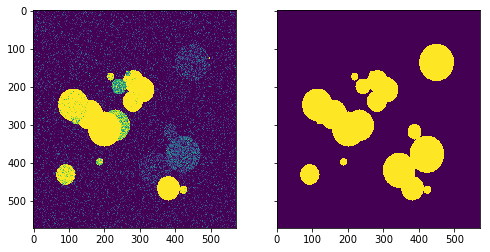

In [6]:
x_test, y_test = generator(4)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
plt.show()

In [7]:
prediction = net.predict(path, x_test)
     
print("Testing error rate: {:.2f}%".format(unet.error_rate(prediction, util.crop_to_shape(y_test, prediction.shape))))

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-10-28 23:13:13,739 Restoring parameters from ./unet_trained/model.cpkt
2017-10-28 23:13:13,992 Model restored from file: ./unet_trained/model.cpkt


Testing error rate: 17.07%


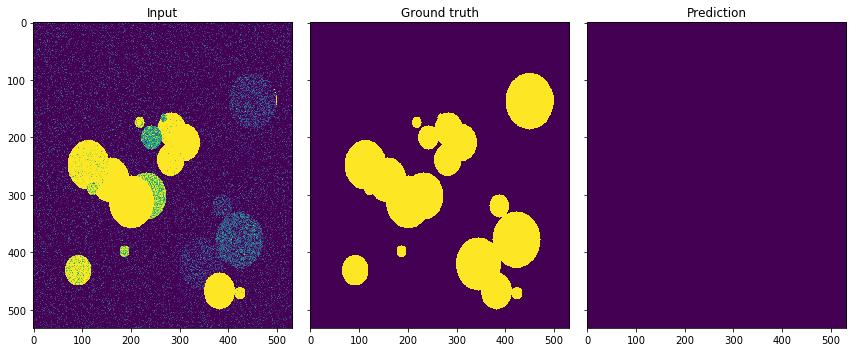

In [8]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()